In [1]:
%%HTML
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('200');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('200');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=true;
    code_toggle()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

In [2]:
%%html  
<style>.cm-s-ipython .CodeMirror-matchingbracket { color: black !important;}</style><!-- Bob J: no green highlights -->
<style>table.dataframe th { vertical-align: top; }</style><!-- Move MultiIndex headers to top of block -->
<style>table.dataframe td, table.dataframe th { border-style: solid; border-width: thin; }</style><!-- thin border around tables -->

# CSC Exercises Summary Data
All times are UTC

In [3]:
%%javascript  # Prefer to display output instead of scrolling, so it can print
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
# Standard definitions and options
import pandas as pd
from pandas import DataFrame
import os
import numpy as np
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15.0, 10.0)
# widen the page to match the window
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# full width display of tables
pd.options.display.max_columns = 50
# want to display all rows
pd.options.display.max_rows = None

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import json
# read log in JSON form, as processed by i.e. transfer.php
with open('log.json', 'r') as f:
    samples_dict = json.load(f)
# samples_dict

In [5]:
exerciseName = {
    "TestIntroJava":       " 1 Testing 1 Intro Java",
    "TestIntroCpp":        " 3 Testing 3 Intro C++",
    "TestIntroPy":         " 2 Testing 2 Intro Python",
    "TestSumPrimesJava":   " 4 Testing 4 TestSumPrimes Java",
    "TestSumPrimesPy":     " 5 Testing 5 TestSumPrimes Python",
    "TestSumPrimesCpp":    " 6 Testing 6 TestSumPrimes C++",
    "ProfileStatsJava":    " 7 Performance 1 Java",
    "ProfileStatsCpp":     " 8 Performance 2 C++",
    "MemIntroCpp":         " 9 Memory 1 C++ Memory Checks",
    "GitBasics1":          "10 Git 1 GitBasics1",
    "GitBasics2":          "11 Git 2 GitBasics2",
    "GitBisect":           "12 Git 3 GitBisect",
    "GitRecovery":         "13 Git 4 Recovery",
    "GitHistory":          "14 Git 5 History"
}


In [6]:
df = DataFrame()
for sample in samples_dict : 
    df = df.append(sample, ignore_index=True)
df = df.replace(np.nan, '', regex=True)

# drop items before School starts?
df = df[df.DATE > "2023-08-19 15:30:00"]
# drop my entries?
# df = df[df.user != 'jake']
# df = df[df.user != 'bojacobs']


# Add column
def lookUpCanFail(array, item, failValue) :
    try :
        return array[item]
    except:
        return failValue

df['Exercise'] = df.apply(lambda row: \
                    lookUpCanFail(exerciseName, row.item2, ""), axis = 1)

#df.head(100)

### Team Names

In [7]:
# extract team names, then drop them
teams = (df[df["item1"]=="team"])[['user', 'item1', 'item2', 'item3']]
display(teams)
df = df[df["item1"]!="team"]

,user,item1,item2,item3
1039,bbalci,team,berk,iza
1048,apervaiz,team,Aroosha,Hadi
1061,strigazi,team,Spyros,Jamie
1070,ischuszt,team,Cristi,Seva
1072,cchauhan,team,Chainika,Fauzia
1111,skalavan,team,Hashmi,Ferhat
1136,ischuszt,team,Cristi,Seva
1239,vcavalli,team,Sara,Viola
1243,sbenitez,team,SaraBenitez,ViolaCavallini
1244,vcavalli,team,ViolaCavallini,SaraBenitez


### Count of how many users started each exercise

,user
Exercise,
1 Testing 1 Intro Java,21
2 Testing 2 Intro Python,44
3 Testing 3 Intro C++,32
4 Testing 4 TestSumPrimes Java,3
5 Testing 5 TestSumPrimes Python,37
6 Testing 6 TestSumPrimes C++,24
7 Performance 1 Java,3
8 Performance 2 C++,47
9 Memory 1 C++ Memory Checks,38


295

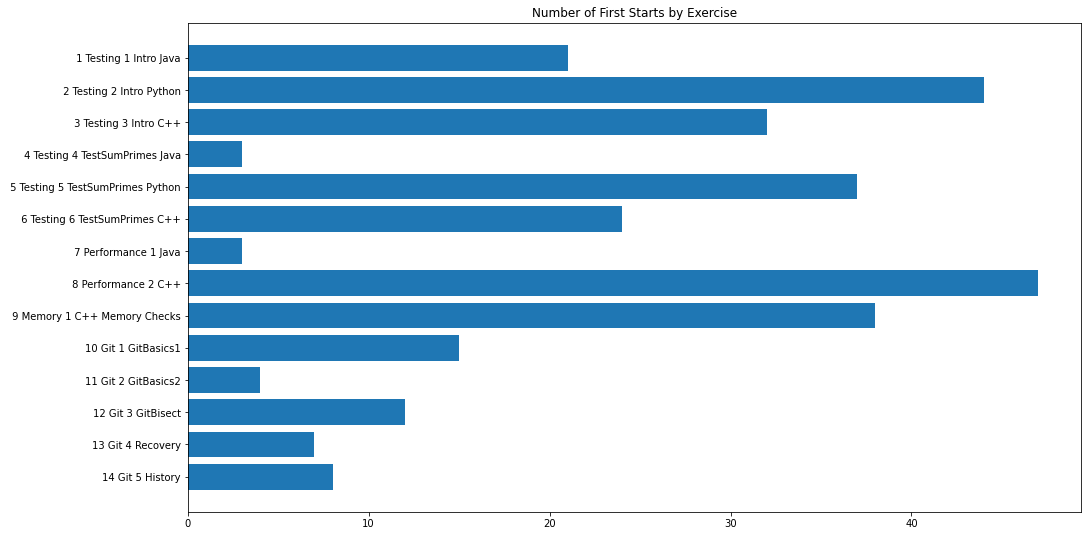

In [8]:
# how many total times for each Exercise
temp = df[["Exercise", "user"]].copy()
t1 = temp[temp.Exercise.notnull()]
t1 = t1[t1.Exercise != ""]
t1 = t1.sort_values(by=['Exercise', 'user']).drop_duplicates()
group = t1.groupby(["Exercise"]).count()
count = group['user']
display(group)
display(count.sum())
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(group.index, count)
ax.invert_yaxis()
ax.set_title('Number of First Starts by Exercise');

### Machine usage information

In [9]:
# show host names so you can e.g. see if somebody working locally
temp = df[['host', 'user']].copy()
#display(temp.groupby(["host", "user"]).count())
temp = df[['host']].copy()
display(temp.groupby(["host"]).count())

""
host
""
LTTI-EHSAN-L
bms2
bms2-centos7
csc-2023-00.cern.ch
csc-2023-01.cern.ch
csc-2023-02.cern.ch
csc-2023-03.cern.ch
csc-2023-04.cern.ch


In [10]:
temp = df[['IP']].copy()
#display(temp.groupby("IP").count())

In [11]:
temp = df[['user', 'host']].sort_values('user').copy()
temp.groupby(["user", "host"]).count()

Empty DataFrame
Columns: []
Index: [(, ), (, LTTI-EHSAN-L), (aheidelbach, bms2), (aheidelbach, bms2-centos7), (anfeng, csc-2023-11.cern.ch), (apervaiz, csc-2023-14.cern.ch), (apimpo, csc-2023-18.cern.ch), (astefl, csc-2023-15.cern.ch), (astefl, csc-2023-19.cern.ch), (avalenzu, csc-2023-06.cern.ch), (bbalci, csc-2023-06.cern.ch), (bbantoob, csc-2023-07.cern.ch), (bbantoob, lxplus784.cern.ch), (bertranf, csc-2023-05.cern.ch), (bpilsl, csc-2023-10.cern.ch), (cacochat, csc-2023-07.cern.ch), (cchauhan, lxplus7123.cern.ch), (cdreisba, csc-2023-12.cern.ch), (chenb, csc-2023-16.cern.ch), (cmatthie, csc-2023-03.cern.ch), (ebagakis, csc-2023-12.cern.ch), (eleutgeb, csc-2023-10.cern.ch), (engarcia, csc-2023-17.cern.ch), (esommer, csc-2023-09.cern.ch), (ewketele, csc-2023-12.cern.ch), (fdegeus, csc-2023-16.cern.ch), (feozturk, csc-2023-06.cern.ch), (glazzari, csc-2023-15.cern.ch), (ijuszcza, lxplus705.cern.ch), (ijuszcza, lxplus7113.cern.ch), (ijuszcza, lxplus763.cern.ch), (ischuszt, csc-2023-17.cern.ch), (ischuszt, lxplus7113.cern.ch), (ischuszt, lxplus712.cern.ch), (ischuszt, lxplus763.cern.ch), (jagoodin, csc-2023-01.cern.ch), (jaromero, csc-2023-03.cern.ch), (jedebevc, csc-2023-15.cern.ch), (jgavrano, lxplus732.cern.ch), (jpolok, csc-2023-18), (jstaa, csc-2023-03.cern.ch), (kmastyna, csc-2023-10.cern.ch), (kssolovi, csc-2023-14.cern.ch), (lereuter, csc-2023-12.cern.ch), (losanti, csc-2023-00.cern.ch), (losanti, csc-2023-18.cern.ch), (mato, lxplus706.cern.ch), (mfaltell, csc-2023-17.cern.ch), (mfrahm, csc-2023-09.cern.ch), (mleputa, csc-2023-15.cern.ch), (mmarcheg, csc-2023-07.cern.ch), (mmatthew, csc-2023-03.cern.ch), (morehar, csc-2023-10.cern.ch), (naszczep, csc-2023-08.cern.ch), (nnathans, csc-2023-05.cern.ch), (nqin, csc-2023-11.cern.ch), (prlewand, csc-2023-16.cern.ch), (rshaheen, csc-2023-02.cern.ch), (sbenitez, csc-2023-08.cern.ch), (scella, csc-2023-18.cern.ch), (sifirooz, csc-2023-04.cern.ch), (sifirooz, lxplus7122.cern.ch), (sifirooz, lxplus724.cern.ch), (sifirooz, lxplus793.cern.ch), (sithiele, csc-2023-11.cern.ch), (skalavan, csc-2023-05.cern.ch), (skalavan, csc-2023-19.cern.ch), (skalavan, lxplus726.cern.ch), (strigazi, csc-2023-01.cern.ch), (tvoigtla, csc-2023-14.cern.ch), (vbadoiu, csc-2023-07.cern.ch), (vcavalli, csc-2023-08.cern.ch), (vyeroshe, csc-2023-17.cern.ch), (vyeroshe, lxplus7127.cern.ch), (vyeroshe, lxplus796.cern.ch), (zhives, csc-2023-16.cern.ch), (zhives, lxplus783.cern.ch), (zwetters, csc-2023-09.cern.ch)]

In [12]:
# progress by each specific user
temp = df[['user', 'Exercise']].sort_values('user').copy()
#display(temp.groupby(["user", "Exercise"]).count())

In [13]:
# look at one user
#display(df[df.user=="jake"])

### Timestamps for exercises starts

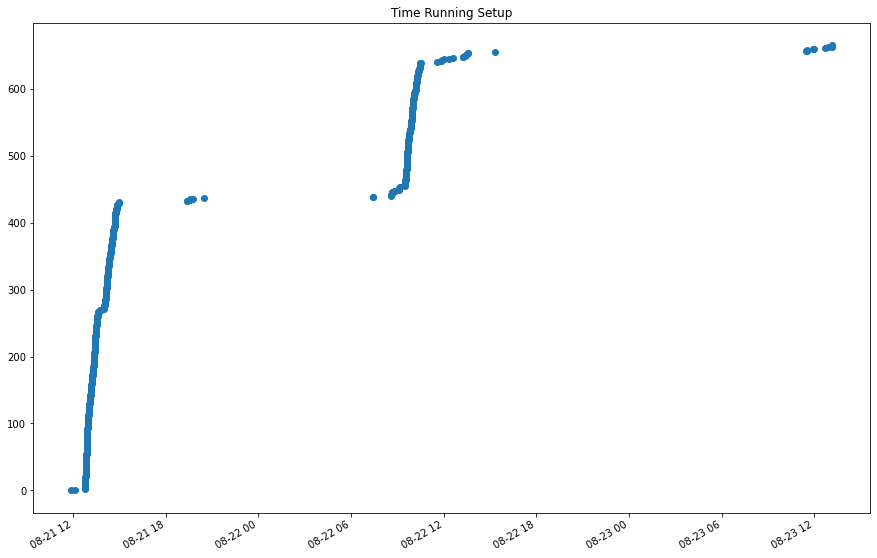

In [14]:
# plot time for all log entries (not exactly what's requested, but close)
t1 = df

# restrict to exercise period 
t1 = t1[t1.DATE > "2022-09-03 14:00:00"]
#t1 = t1[t1.DATE < "2022-09-09 16:15:00"]
times = pd.to_datetime(t1["DATE"]) # already in order by time as log is written
count = np.arange(0, len(times))
plt.plot_date(times, count)
plt.gcf().autofmt_xdate()
plt.title("Time Running Setup")
plt.show()

### Time users started exercises, after the time needed for checkout

In [15]:
# first 'setup' (startup) time - this is the start of working on the exercises
t1 = df[df.item1 == 'setup']
t1.drop_duplicates(['user'], keep='first')[["DATE", "IP", "host", "user"]]

,DATE,IP,host,user
1035,2023-08-21 11:53:22,137.138.124.102,lxplus7113.cern.ch,ijuszcza
1037,2023-08-21 12:44:32,128.142.33.53,csc-2023-06.cern.ch,bbalci
1038,2023-08-21 12:44:48,128.142.33.20,csc-2023-15.cern.ch,glazzari
1040,2023-08-21 12:45:40,128.142.33.11,csc-2023-19.cern.ch,astefl
1041,2023-08-21 12:46:06,128.142.33.41,csc-2023-14.cern.ch,apervaiz
1042,2023-08-21 12:46:11,128.142.33.54,csc-2023-12.cern.ch,ebagakis
1043,2023-08-21 12:46:22,128.142.33.21,csc-2023-18.cern.ch,scella
1044,2023-08-21 12:46:31,128.142.33.36,csc-2023-04.cern.ch,sifirooz
1045,2023-08-21 12:46:32,128.142.33.25,csc-2023-17.cern.ch,vyeroshe
1046,2023-08-21 12:46:34,128.142.33.22,csc-2023-09.cern.ch,mfrahm


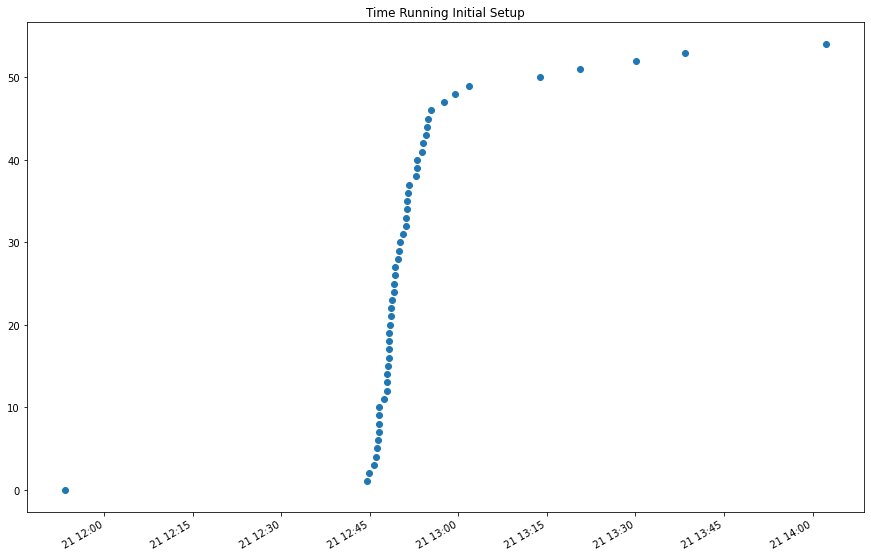

In [25]:
# plot the 'setup' (startup) time (when the student got to 'source setup', i.e. after checkout)
t1 = df[df.item1 == 'setup']

# restrict to exercise period 
t1 = t1[t1.DATE > "2023-08-20 11:00:00"]
t1 = t1[t1.DATE < "2023-08-21 17:55:00"]


#t1 = t1[t1.DATE < "2022-09-06 13:00:00"]

# Drop duplicates by user
t1 = t1.drop_duplicates("user")

times = pd.to_datetime(t1["DATE"]) # already in order by time as log is written
count = np.arange(0, len(times))
plt.plot_date(times, count)
plt.gcf().autofmt_xdate()
plt.title("Time Running Initial Setup")
plt.show()


### Most recent exercise by user

In [17]:
# most recent 'Exercise' by user
t1 = df[df.Exercise.notnull()]
t2 = t1.drop_duplicates(['user'], keep='last').sort_values(['user'])
t2[['DATE','user','Exercise']]

,DATE,user,Exercise
1685,2023-08-22 11:32:57,,8 Performance 2 C++
1489,2023-08-22 08:37:36,aheidelbach,3 Testing 3 Intro C++
1657,2023-08-22 10:15:26,anfeng,13 Git 4 Recovery
1565,2023-08-22 09:41:51,apervaiz,10 Git 1 GitBasics1
1678,2023-08-22 10:26:17,apimpo,12 Git 3 GitBisect
1526,2023-08-22 09:35:46,astefl,9 Memory 1 C++ Memory Checks
1706,2023-08-23 12:42:03,avalenzu,14 Git 5 History
1425,2023-08-21 14:34:35,bbalci,8 Performance 2 C++
1681,2023-08-22 10:27:17,bbantoob,14 Git 5 History
1461,2023-08-21 14:45:34,bertranf,


### Most recent exercise by time

In [18]:
# most recent 'Exercise' by time
t1 = df[df.Exercise.notnull()]
t2 = t1.drop_duplicates(['user'], keep='last').sort_values(['DATE'])
t2[['DATE','user','Exercise']]

,DATE,user,Exercise
1312,2023-08-21 13:38:35,mato,
1369,2023-08-21 14:15:07,rshaheen,8 Performance 2 C++
1394,2023-08-21 14:22:24,ijuszcza,8 Performance 2 C++
1418,2023-08-21 14:31:48,glazzari,12 Git 3 GitBisect
1425,2023-08-21 14:34:35,bbalci,8 Performance 2 C++
1426,2023-08-21 14:35:17,fdegeus,8 Performance 2 C++
1449,2023-08-21 14:43:26,nqin,8 Performance 2 C++
1451,2023-08-21 14:43:39,vbadoiu,9 Memory 1 C++ Memory Checks
1452,2023-08-21 14:43:52,ebagakis,9 Memory 1 C++ Memory Checks
1453,2023-08-21 14:43:58,cdreisba,9 Memory 1 C++ Memory Checks


Exercise
 3 Testing 3 Intro C++            1
 8 Performance 2 C++              8
 9 Memory 1 C++ Memory Checks    19
10 Git 1 GitBasics1               9
11 Git 2 GitBasics2               1
12 Git 3 GitBisect                5
13 Git 4 Recovery                 2
14 Git 5 History                  5
Name: user, dtype: int64

50

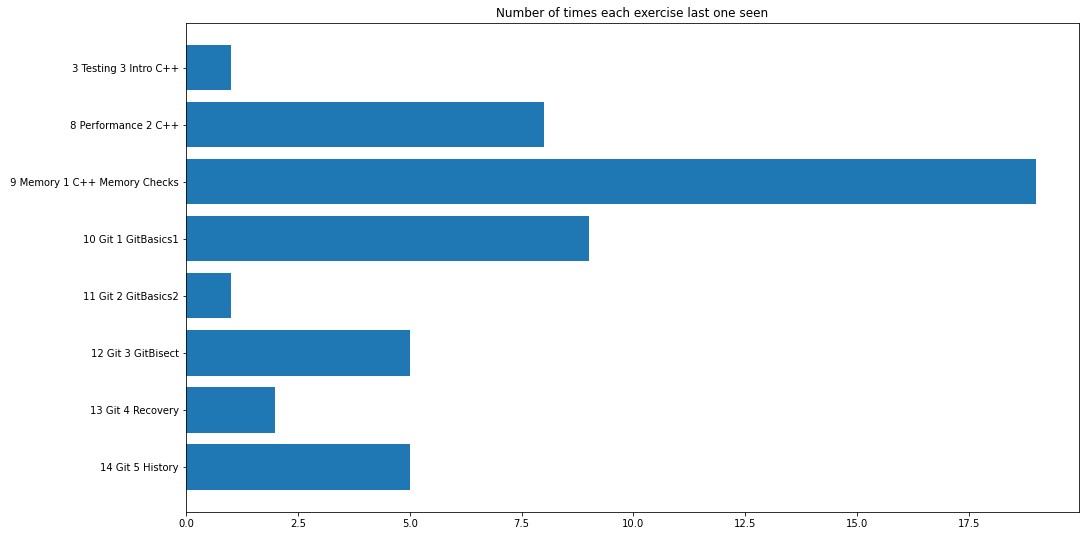

In [19]:
group = t2[t2.Exercise.notnull()]
group = group[group.Exercise != ""]
group = group.groupby(["Exercise"]).count()

count = group['user']
display(group['user'])
display(count.sum())
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(group.index, count)
ax.invert_yaxis()
ax.set_title('Number of times each exercise last one seen');

Last 20 activities

In [20]:
# activity near the end 
t2 = t1.drop_duplicates(['user'], keep='last').sort_values(['DATE'])
t2[['DATE','user','Exercise']].tail(20)

,DATE,user,Exercise
1662,2023-08-22 10:17:09,jagoodin,10 Git 1 GitBasics1
1668,2023-08-22 10:21:02,engarcia,13 Git 4 Recovery
1669,2023-08-22 10:21:04,strigazi,
1674,2023-08-22 10:25:27,esommer,9 Memory 1 C++ Memory Checks
1676,2023-08-22 10:26:11,morehar,10 Git 1 GitBasics1
1677,2023-08-22 10:26:17,tvoigtla,
1678,2023-08-22 10:26:17,apimpo,12 Git 3 GitBisect
1681,2023-08-22 10:27:17,bbantoob,14 Git 5 History
1682,2023-08-22 10:28:14,nnathans,12 Git 3 GitBisect
1685,2023-08-22 11:32:57,,8 Performance 2 C++


### How many times is each exercise the most recent (i.e. current) for people?

In [21]:
# count the number of people with each exercise as most recent
temp = df[['user', 'Exercise']].sort_values('user').copy()
t1 = temp[temp.Exercise.notnull()]
t1 = t1[t1.Exercise != '']
t2 = t1.drop_duplicates(['user'], keep='last')
t2.sort_values("Exercise")
t2.groupby("Exercise").count()

,user
Exercise,
1 Testing 1 Intro Java,6
2 Testing 2 Intro Python,6
3 Testing 3 Intro C++,4
4 Testing 4 TestSumPrimes Java,1
5 Testing 5 TestSumPrimes Python,8
6 Testing 6 TestSumPrimes C++,4
7 Performance 1 Java,2
8 Performance 2 C++,13
9 Memory 1 C++ Memory Checks,7


In [22]:
# t1.tail(5)  # t1 is exercise sequence

### When did users start their most recent exercise?

,user,item1,item2,item3,item4,host,IP,REMOTE_HOST,DATE,Exercise
1312,mato,setup,,,,lxplus706.cern.ch,188.185.9.253,,2023-08-21 13:38:35,
1369,rshaheen,file,ProfileStatsCpp,,,csc-2023-02.cern.ch,128.142.33.26,,2023-08-21 14:15:07,8 Performance 2 C++
1394,ijuszcza,file,ProfileStatsCpp,,,lxplus763.cern.ch,188.185.27.72,,2023-08-21 14:22:24,8 Performance 2 C++
1418,glazzari,file,GitBisect,,,csc-2023-15.cern.ch,128.142.33.20,,2023-08-21 14:31:48,12 Git 3 GitBisect
1425,bbalci,file,ProfileStatsCpp,,,csc-2023-06.cern.ch,128.142.33.53,,2023-08-21 14:34:35,8 Performance 2 C++


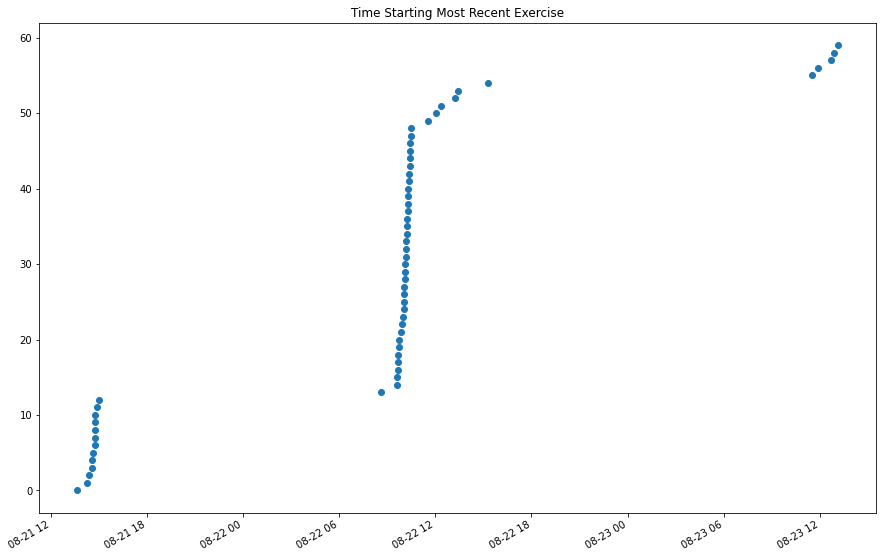

In [23]:
# plot time users started their last exercise
t3 = df[df.item1.notnull()]
t3 = t3[t3.item1 != '']
t3 = t3.drop_duplicates(['user'], keep='last')
t3.sort_values("DATE")
display(t3.head())

#t3 = t3[t3.DATE < "2019-09-18 17:30:00"]
#t3 = t3[t3.DATE > "2019-09-18 15:30:00"]

times = pd.to_datetime(t3["DATE"])
count = np.arange(0, len(times))
plt.plot_date(times, count)
plt.gcf().autofmt_xdate()
plt.title("Time Starting Most Recent Exercise")
plt.show()

